### You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

#### The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

#### From the home page, the user can perform a search and land on the search page. From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.

#### If she does decide to buy, she ends up on the confirmation page

### The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

### Specifically, she is interested in:

#### (1) A full picture of the funnel conversion rate for both desktop and mobile.

#### (2) Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

### Load the package would be used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read in the data set

In [2]:
user = pd.read_csv("../Datasets/Funnel/user_table.csv")
#### Check if unique user ID
print(len(user["user_id"]) == len(np.unique(user["user_id"])))
print(user.head())

home = pd.read_csv("../Datasets/Funnel/home_page_table.csv")
#### Check if unique user ID
print(len(home["user_id"]) == len(np.unique(home["user_id"])))
print(home.head())

search = pd.read_csv("../Datasets/Funnel/search_page_table.csv")
#### Check if unique user ID
print(len(search["user_id"]) == len(np.unique(search["user_id"])))
print(search.head())

payment = pd.read_csv("../Datasets/Funnel/payment_page_table.csv")
#### Check if unique user ID
print(len(payment["user_id"]) == len(np.unique(payment["user_id"])))
print(payment.head())

confirm = pd.read_csv("../Datasets/Funnel/payment_confirmation_table.csv")
#### Check if unique user ID
print(len(confirm["user_id"]) == len(np.unique(confirm["user_id"])))
print(confirm.head())

True
   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male
True
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page
True
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page
True
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page
True
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


In [3]:
dat0 = pd.merge(user, home, on = ["user_id"], how = "left")
dat0 = pd.merge(dat0, search, on = ["user_id"], how = "left", suffixes=("_home", "_search"))
dat0 = pd.merge(dat0, payment, on = ["user_id"], how = "left")
dat0 = pd.merge(dat0, confirm, on = ["user_id"], how = "left", suffixes=("_payment", "_confirm"))
dat0.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirm
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [4]:
dat0.replace(np.nan, 0, inplace = True)
dat0["page_home"] = dat0["page_home"].replace("home_page", 1)
dat0["page_search"] = dat0["page_search"].replace("search_page", 1)
dat0["page_payment"] = dat0["page_payment"].replace("payment_page", 1)
dat0["page_confirm"] = dat0["page_confirm"].replace("payment_confirmation_page", 1)
dat0["date"] = pd.to_datetime(dat0["date"])
dat0.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirm
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


In [5]:
print(dat0.describe())
print(dat0.groupby(["device"]).size())
print(dat0.groupby(["sex"]).size())

             user_id  page_home   page_search  page_payment  page_confirm
count   90400.000000    90400.0  90400.000000  90400.000000  90400.000000
mean   498709.683473        1.0      0.500000      0.066704      0.005000
std    289040.674085        0.0      0.500003      0.249509      0.070534
min        17.000000        1.0      0.000000      0.000000      0.000000
25%    247978.750000        1.0      0.000000      0.000000      0.000000
50%    498267.000000        1.0      0.500000      0.000000      0.000000
75%    749789.250000        1.0      1.000000      0.000000      0.000000
max    999979.000000        1.0      1.000000      1.000000      1.000000
device
Desktop    60200
Mobile     30200
dtype: int64
sex
Female    45075
Male      45325
dtype: int64


### A full picture of the funnel conversion rate for both desktop and mobile.
#### Overall Conversion Rate

         Step  Conversion Rate
0   to_search         0.500000
1      to_pay         0.133407
2  to_confirm         0.074959


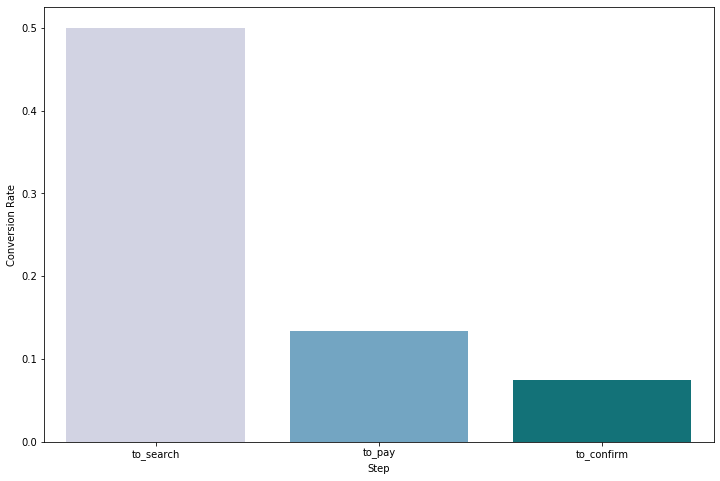

In [6]:
overall_rates = [sum(dat0["page_search"])/sum(dat0["page_home"]), 
                 sum(dat0["page_payment"])/sum(dat0["page_search"]),
                 sum(dat0["page_confirm"])/sum(dat0["page_payment"])]
col_names = ["to_search", "to_pay", "to_confirm"]
overall_convert = pd.DataFrame({"Step": col_names, "Conversion Rate": overall_rates}, 
                               columns = ["Step", "Conversion Rate"])
print(overall_convert)

plt.figure(figsize = [12, 8])
sns.barplot(x = "Step", y = "Conversion Rate", data = overall_convert, palette = "PuBuGn")

#### Conversion rate by device type

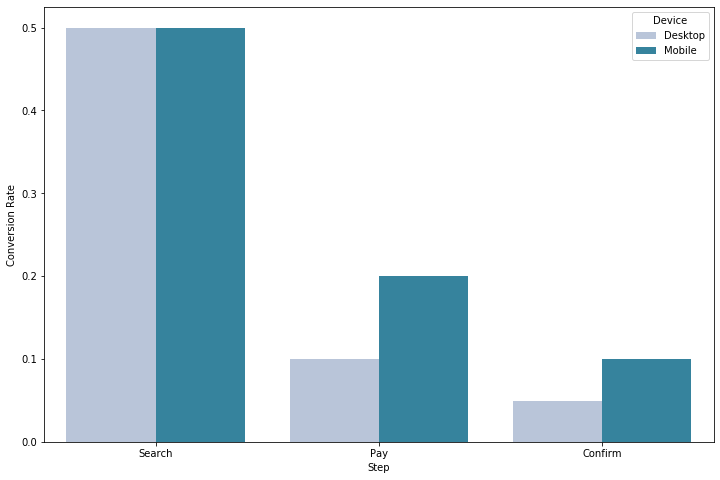

In [7]:
device = dat0.groupby("device")
search_dict = (device.sum()["page_search"]/device.sum()["page_home"]).to_dict()
pay_dict = (device.sum()["page_payment"]/device.sum()["page_search"]).to_dict()
confirm_dict = (device.sum()["page_confirm"]/device.sum()["page_payment"]).to_dict()
search_df = pd.DataFrame(search_dict, index = ["Search"])
pay_df = pd.DataFrame(pay_dict, index = ["Pay"])
confirm_df = pd.DataFrame(confirm_dict, index = ["Confirm"])
device_rates = search_df.append(pay_df).append(confirm_df)

device_convert0 = pd.DataFrame(device_rates.stack()).rename(columns = {0: "Conversion Rate"})
device_convert = device_convert0.reset_index().rename(columns = {"level_0": "Step", "level_1": "Device"})
plt.figure(figsize = [12, 8])
sns.barplot(x = "Step", y = "Conversion Rate", data = device_convert, palette = "PuBuGn", hue = "Device")

#### Conversion rate by sex

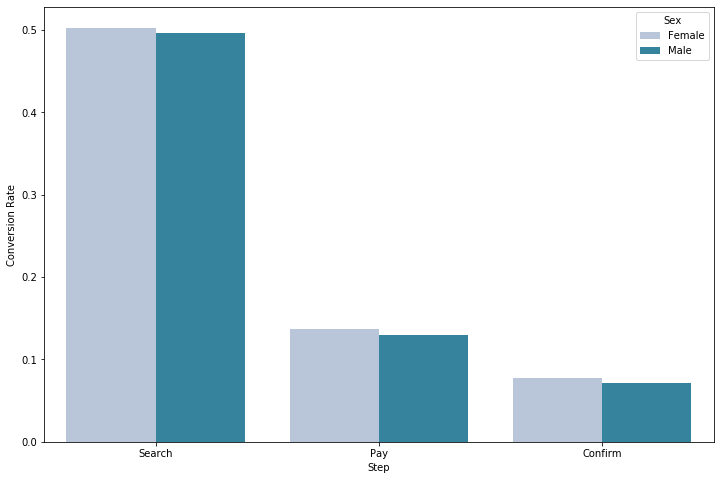

In [8]:
sex = dat0.groupby("sex")
search_dict = (sex.sum()["page_search"]/sex.sum()["page_home"]).to_dict()
pay_dict = (sex.sum()["page_payment"]/sex.sum()["page_search"]).to_dict()
confirm_dict = (sex.sum()["page_confirm"]/sex.sum()["page_payment"]).to_dict()
search_df = pd.DataFrame(search_dict, index = ["Search"])
pay_df = pd.DataFrame(pay_dict, index = ["Pay"])
confirm_df = pd.DataFrame(confirm_dict, index = ["Confirm"])
sex_rates = search_df.append(pay_df).append(confirm_df)

sex_convert0 = pd.DataFrame(sex_rates.stack()).rename(columns = {0: "Conversion Rate"})
sex_convert = sex_convert0.reset_index().rename(columns = {"level_0": "Step", "level_1": "Sex"})
plt.figure(figsize = [12, 8])
sns.barplot(x = "Step", y = "Conversion Rate", data = sex_convert, palette = "PuBuGn", hue = "Sex")

#### Conversion rate by date

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


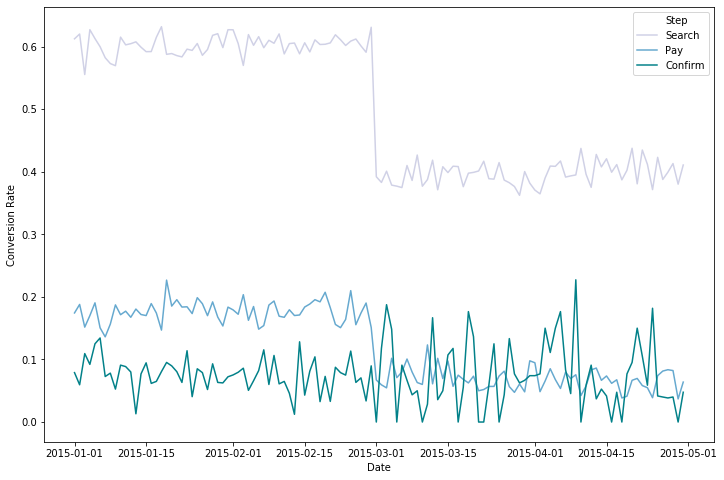

In [9]:
date = dat0.groupby("date")
search_dict = (date.sum()["page_search"]/date.sum()["page_home"]).to_dict()
pay_dict = (date.sum()["page_payment"]/date.sum()["page_search"]).to_dict()
confirm_dict = (date.sum()["page_confirm"]/date.sum()["page_payment"]).to_dict()
search_df = pd.DataFrame(search_dict, index = ["Search"])
pay_df = pd.DataFrame(pay_dict, index = ["Pay"])
confirm_df = pd.DataFrame(confirm_dict, index = ["Confirm"])
date_rates = search_df.append(pay_df).append(confirm_df)
date_convert0 = pd.DataFrame(date_rates.stack()).rename(columns = {0: "Conversion Rate"})
date_convert = date_convert0.reset_index().rename(columns = {"level_0": "Step", "level_1": "Date"})
plt.figure(figsize = [12, 8])
sns.lineplot(x = "Date", y = "Conversion Rate", data = date_convert, palette = "PuBuGn", hue = "Step")

#### Conversion rate by date \& device

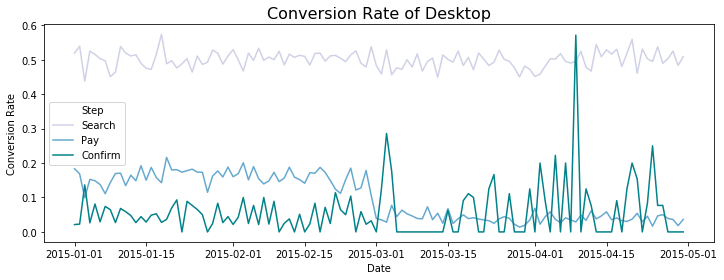

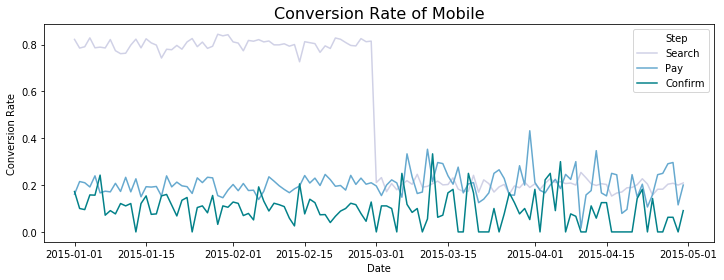

In [10]:
dev_date = dat0.groupby(["device", "date"])
search_dict = (dev_date.sum()["page_search"]/dev_date.sum()["page_home"]).to_dict()
pay_dict = (dev_date.sum()["page_payment"]/dev_date.sum()["page_search"]).to_dict()
confirm_dict = (dev_date.sum()["page_confirm"]/dev_date.sum()["page_payment"]).to_dict()
search_df = pd.DataFrame(search_dict, index = ["Search"])
pay_df = pd.DataFrame(pay_dict, index = ["Pay"])
confirm_df = pd.DataFrame(confirm_dict, index = ["Confirm"])
dev_date_rates0 = search_df.append(pay_df).append(confirm_df)
dev_date_rates = pd.DataFrame(dev_date_rates0.stack())
dev_date_convert0 = pd.DataFrame(dev_date_rates.stack()).rename(columns = {0: "Conversion Rate"})

dev_date_convert = dev_date_convert0.reset_index().rename(columns = {"level_0": "Step", "level_1": "Date", "level_2": "Device"})
plt.figure(figsize = [12, 4])
plt.title("Conversion Rate of Desktop", fontsize = 16)
sns.lineplot(x = "Date", y = "Conversion Rate", data = dev_date_convert[dev_date_convert["Device"] == "Desktop"], palette = "PuBuGn", hue = "Step")

plt.figure(figsize = [12, 4])
plt.title("Conversion Rate of Mobile", fontsize = 16)
sns.lineplot(x = "Date", y = "Conversion Rate", data = dev_date_convert[dev_date_convert["Device"] == "Mobile"], palette = "PuBuGn", hue = "Step")